In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import tensorflow as tf
import os
import numpy as np
import tifffile as tif

In [29]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [8]:
input_file = 'isbi/train-input.tif'
our_file = tif.imread(input_file)


In [12]:
type(our_file)

numpy.core.memmap.memmap

In [47]:
dataset = tf.constant(our_file)
sample = tf.random_crop(dataset, size=[1, 256, 256])
distorted_image = tf.image.random_flip_left_right(sample)
distorted_image = tf.image.random_flip_up_down(distorted_image)
# distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)

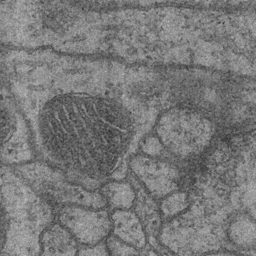

In [58]:
with tf.Session() as sess:
    f = sess.run(distorted_image)
    showarray(np.squeeze(f))

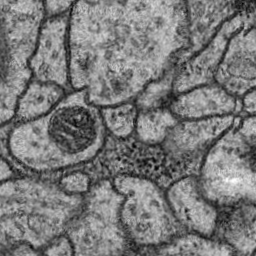